## Análisis Exploratorio de los Ingresos recaudados de la Municipalidad Distrital de Pucusana - Año 2022
La información corresponde a todos los ingresos recaudados por la Municipalidad Distrital de Pucusana en el año 2022 (Enero - Setiembre). Los tipos de ingresos corresponden a impuesto predial, arbitrios (limpieza pública, parques y jardines o serenazgo) y otros conceptos como: formularios, carnets, constancias, multas, etc.

## 1. Carga de Datos de Diferentes Origenes

In [1]:
import pandas as pd

url='https://drive.google.com/file/d/1P7gB1y4SbMEeeQwOA-eX_AYiI-4tc9oR/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url, encoding = 'utf-8', sep=';')

df.shape

(101859, 38)

In [2]:
df.columns

Index(['FECHA_CORTE', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'ANIO', 'NUMMOVIMIENTO', 'TIPOMOV', 'CODPERSONA', 'docidentidad',
       'DATOSPERSONA', 'OBSERVACIONES', ' IMPORTE_C ', ' DERECHO_C ',
       ' INTERESES_C ', ' REAJUSTE_C ', ' DESCUENTO_C ', ' TOTALCOBRADO ',
       ' RECIBIDO ', ' VUELTO ', 'FECHACANC', 'FECHACANC.1', 'TIPOPAGO',
       'NUMORDEN', 'ANIORECIBO', 'NUMRECIBO', 'CODCUENTA', 'CODTRIBUTO',
       'NUMCUOTA', 'CODPREDIO', 'UBICACIONPREDIAL', 'CONCEPTO', ' IMPORTE_D ',
       ' DERECHO_D ', ' INTERESES_D ', ' REAJUSTE_D ', ' DESCUENTO_D ',
       ' SUBTOTAL_D '],
      dtype='object')

In [3]:
# Eliminando los caracteres en blanco del nombre de las columnas
df.rename(columns = {' IMPORTE_C ':'IMPORTE_C', 
                     ' DERECHO_C ':'DERECHO_C',
                     ' INTERESES_C ':'INTERESES_C',
                     ' REAJUSTE_C ':'REAJUSTE_C',
                     ' DESCUENTO_C ':'DESCUENTO_C',
                     ' TOTALCOBRADO ':'TOTALCOBRADO',
                     ' RECIBIDO ':'RECIBIDO',
                     ' VUELTO ':'VUELTO',
                     ' DERECHO_D ':'DERECHO_D',
                     ' INTERESES_D ':'INTERESES_D',
                     ' REAJUSTE_D ':'REAJUSTE_D',
                     ' IMPORTE_D ':'IMPORTE_D',
                     ' DESCUENTO_D ':'DESCUENTO_D',
                     ' SUBTOTAL_D ':'SUBTOTAL_D'}, inplace=True)

In [4]:
# String to Float format
def StringToFloatFormat(x):
  partialNum = x.split(',')
  allNum = ''
  
  for num in partialNum:
    allNum = allNum + num

  return allNum

#print(StringToFloatFormat('19,571.37'))
df['TOTALCOBRADO'] = df['TOTALCOBRADO'].apply(StringToFloatFormat)

In [5]:
df['FECHA_CORTE'] = df['FECHA_CORTE'].astype(str)
df['UBIGEO'] = df['UBIGEO'].astype(str)
df['TOTALCOBRADO'] = df['TOTALCOBRADO'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101859 entries, 0 to 101858
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FECHA_CORTE       101859 non-null  object 
 1   UBIGEO            101859 non-null  object 
 2   DEPARTAMENTO      101859 non-null  object 
 3   PROVINCIA         101859 non-null  object 
 4   DISTRITO          101859 non-null  object 
 5   ANIO              101859 non-null  int64  
 6   NUMMOVIMIENTO     101859 non-null  int64  
 7   TIPOMOV           101859 non-null  object 
 8   CODPERSONA        101859 non-null  int64  
 9   docidentidad      101859 non-null  object 
 10  DATOSPERSONA      101859 non-null  object 
 11  OBSERVACIONES     98061 non-null   object 
 12  IMPORTE_C         101859 non-null  object 
 13  DERECHO_C         101859 non-null  object 
 14  INTERESES_C       101859 non-null  object 
 15  REAJUSTE_C        101859 non-null  object 
 16  DESCUENTO_C       10

In [6]:
#dataContepto = df.groupby(['CONCEPTO'])['CONCEPTO'].count()

#dfAlcabala = df.query("((CONCEPTO == 'ALCABALA'))")
#dfAlcabala['TOTALCOBRADO']
#dfAlcabala['TOTALCOBRADO'].sum()

In [81]:
col_interes = ['CODPERSONA', 'TOTALCOBRADO', 'RECIBIDO', 'FECHACANC', 'FECHACANC.1', 'TIPOPAGO', 'CODTRIBUTO', 'CONCEPTO']
df[col_interes].head()

,CODPERSONA,TOTALCOBRADO,RECIBIDO,FECHACANC,FECHACANC.1,TIPOPAGO,CODTRIBUTO,CONCEPTO
0,4066,146.05,146.05,3/01/2022,lunes0103,BCP,1.0,IMPUESTO PREDIAL
1,4066,44.36,44.36,3/01/2022,lunes0103,BCP,1.0,LIMPIEZA PÚBLICA
2,4066,44.36,44.36,3/01/2022,lunes0103,BCP,3.0,PARQUES Y JARDINES
3,4066,44.36,44.36,3/01/2022,lunes0103,BCP,4.0,SERENAZGO
4,10321,518.28,600.00,4/01/2022,martes0104,EFECTIVO,1.0,IMPUESTO PREDIAL


In [51]:
from tables import index

dataTipoPago = df.groupby(['TIPOPAGO']).agg({'TIPOPAGO':'count', 'TOTALCOBRADO':['sum', 'max']})
dataTipoPago = dataTipoPago.reset_index()

headers = ['TipoPago', 'Count', 'Sum', 'Max']
dataTipoPago.columns = headers

dataTipoPagoSortBySum = dataTipoPago.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataTipoPagoSortBySum

,TipoPago,Count,Sum,Max
0,BCP,32970,2.873328e+08,437071.76
1,EFECTIVO,45280,3.467979e+07,73015.13
2,VISA,21981,2.999377e+07,28165.71
3,OPENPAY,1065,3.166908e+06,8725.87
4,CHEQUE,563,3.010220e+06,24521.00


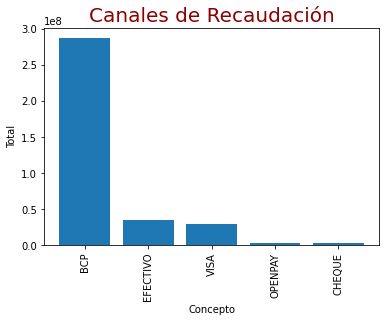

In [55]:
import matplotlib.pyplot as plt

x = dataTipoPagoSortBySum.TipoPago.tolist()
y = dataTipoPagoSortBySum.Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Canales de Recaudación', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [57]:
dataContepto = df.groupby(['CONCEPTO']).agg({'CONCEPTO':'count',
                                             'TOTALCOBRADO':['sum', 'max']})
dataContepto = dataContepto.reset_index()
dataContepto.head()

CONCEPTO       TOTALCOBRADO           
                                    count          sum        max
0                          ALCABALA     8    362380.38  155461.52
1                 BAÑOS MUNICIPALES   398     48323.85    1351.00
2                           CARNETS    14       263.20      18.80
3  CARNETS Y/O TARJETAS DE ATENCION   231      4334.00      18.80
4        CERTIFICADOS DOMICILIARIOS     1         8.80       8.80

In [58]:
dataContepto.shape

(53, 4)

In [59]:
dataContepto.columns

MultiIndex([(    'CONCEPTO',      ''),
            (    'CONCEPTO', 'count'),
            ('TOTALCOBRADO',   'sum'),
            ('TOTALCOBRADO',   'max')],
           )

In [60]:
from tables import index
headers = ['Concepto', 'Count', 'Sum', 'Max']
dataContepto.columns = headers

dataConteptoSortBySum = dataContepto.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataConteptoSortBySum.head()

,Concepto,Count,Sum,Max
0,LIMPIEZA PÚBLICA,27463,1.149202e+08,437071.76
1,SERENAZGO,26450,1.118026e+08,437071.76
2,PARQUES Y JARDINES,21956,9.702921e+07,437071.76
3,IMPUESTO PREDIAL,20222,3.206345e+07,437071.76
4,MULTA TRIBUTARIA,94,6.998169e+05,139731.69


In [61]:
dataConteptoSortBySum['Sum'].shape

(53,)

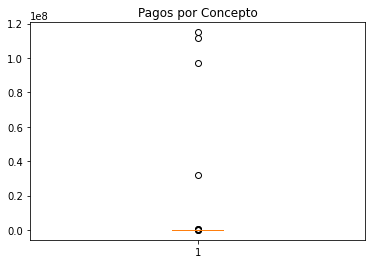

In [62]:
import matplotlib.pyplot as plt

plt.boxplot(dataConteptoSortBySum['Sum'].tolist())
plt.title('Pagos por Concepto')
plt.show()

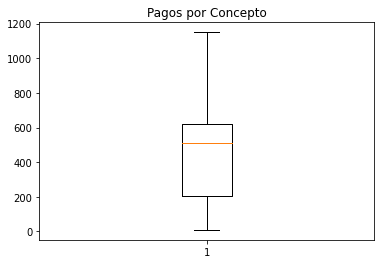

In [63]:
import matplotlib.pyplot as plt

plt.boxplot(dataConteptoSortBySum['Sum'].tail(20).tolist())
plt.title('Pagos por Concepto')
plt.show()

## Evaluando los conceptos con mayor recaudación

In [75]:
rango = dataConteptoSortBySum.index<5
rango

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [76]:
dataConteptoSortBySum[rango]

,Concepto,Count,Sum,Max
0,LIMPIEZA PÚBLICA,27463,1.149202e+08,437071.76
1,SERENAZGO,26450,1.118026e+08,437071.76
2,PARQUES Y JARDINES,21956,9.702921e+07,437071.76
3,IMPUESTO PREDIAL,20222,3.206345e+07,437071.76
4,MULTA TRIBUTARIA,94,6.998169e+05,139731.69


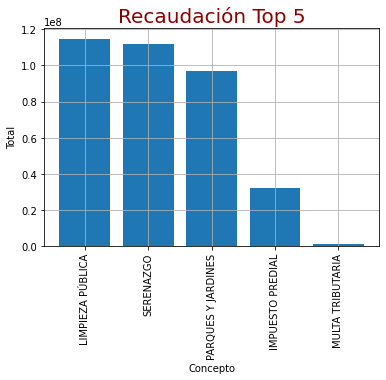

In [77]:
import matplotlib.pyplot as plt

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 5', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.bar(dataConteptoSortBySum[rango].Concepto.tolist(), dataConteptoSortBySum[rango].Sum.tolist())

plt.grid(True)
plt.show()

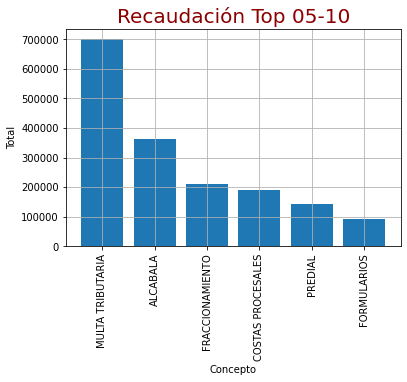

In [74]:
plt.title('Recaudación Top 05-10', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)
rango = (dataConteptoSortBySum.index>=4)&(dataConteptoSortBySum.index<10)
plt.bar(dataConteptoSortBySum[rango].Concepto.tolist(), dataConteptoSortBySum[rango].Sum.tolist())

plt.grid(True)
plt.show()

In [109]:
dataMY = df.copy(deep=True)
dataMY['FechaMY'] = dataMY['FECHACANC'].apply(lambda x:x[len(x)-7:])


dataMYTiempo = dataMY.groupby(['FechaMY']).agg({'FechaMY':'count',
                                             'TOTALCOBRADO':['sum']})
dataMYTiempo = dataMYTiempo.reset_index()
#dataMYTiempo.head()
headers = ['FechaMY', 'Count', 'Sum']
dataMYTiempo.columns = headers
dataMYTiempo
#dataMYTime = pd.crosstab(dataMY.FechaMY, dataMY.dis_tipo)
#dataMYTime.reset_index(inplace=True)
#dataMYTime.tail()

,FechaMY,Count,Sum
0,01/2022,6048,8.882067e+06
1,02/2022,16526,2.032219e+07
2,03/2022,16525,2.897043e+07
3,04/2022,6854,8.400909e+06
4,05/2022,16339,2.330270e+08
5,06/2022,7220,7.456152e+06
6,07/2022,7771,1.333010e+07
7,08/2022,8975,1.311596e+07
8,09/2022,15601,2.467865e+07


In [110]:
import plotly.express as px

fig = px.line(dataMYTiempo, x='FechaMY', y=dataMYTiempo.columns, 
              hover_data={'FechaMY':'|%B %d, %Y'}, template = 'plotly_dark',
              title='PCD Inscritas "2000 al 2021"')
fig.update_xaxes(
    dtick='M1',
    tickformat='%b\n%Y',
    ticklabelmode='period')

fig.show()
# F=PCD Fisica - I=PCD Intelectual - FI=PCD Física e Intelectual

In [104]:
#dataMY[col_interes]
dataMY[['FechaMY', 'FECHACANC']]

,FechaMY,FECHACANC
0,01/2022,3/01/2022
1,01/2022,3/01/2022
2,01/2022,3/01/2022
3,01/2022,3/01/2022
4,01/2022,4/01/2022
...,...,...
101854,09/2022,30/09/2022
101855,09/2022,30/09/2022
101856,09/2022,30/09/2022
101857,09/2022,30/09/2022


## Evaluando los canales de pago del Top 5 de Recaudación

In [82]:
condicion = "(CONCEPTO == 'LIMPIEZA PÚBLICA') | (CONCEPTO == 'SERENAZGO') | (CONCEPTO == 'PARQUES Y JARDINES') | (CONCEPTO == 'IMPUESTO PREDIAL') | (CONCEPTO == 'MULTA TRIBUTARIA')"
dataTop5Concepto = df.query(condicion)
dataTop5Concepto[col_interes].head()

,CODPERSONA,TOTALCOBRADO,RECIBIDO,FECHACANC,FECHACANC.1,TIPOPAGO,CODTRIBUTO,CONCEPTO
0,4066,146.05,146.05,3/01/2022,lunes0103,BCP,1.0,IMPUESTO PREDIAL
1,4066,44.36,44.36,3/01/2022,lunes0103,BCP,1.0,LIMPIEZA PÚBLICA
2,4066,44.36,44.36,3/01/2022,lunes0103,BCP,3.0,PARQUES Y JARDINES
3,4066,44.36,44.36,3/01/2022,lunes0103,BCP,4.0,SERENAZGO
4,10321,518.28,600.00,4/01/2022,martes0104,EFECTIVO,1.0,IMPUESTO PREDIAL


In [83]:
from tables import index

dataTipoPagoTop5 = dataTop5Concepto.groupby(['TIPOPAGO']).agg({'TIPOPAGO':'count', 'TOTALCOBRADO':['sum', 'max']})
dataTipoPagoTop5 = dataTipoPagoTop5.reset_index()

headers = ['TipoPago', 'Count', 'Sum', 'Max']
dataTipoPagoTop5.columns = headers

dataTipoPagoTop5SortBySum = dataTipoPagoTop5.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataTipoPagoTop5SortBySum

,TipoPago,Count,Sum,Max
0,BCP,32769,2.867373e+08,437071.76
1,EFECTIVO,40551,3.395168e+07,30044.15
2,VISA,21249,2.973500e+07,28165.71
3,OPENPAY,1064,3.158182e+06,8725.87
4,CHEQUE,552,2.933039e+06,24521.00


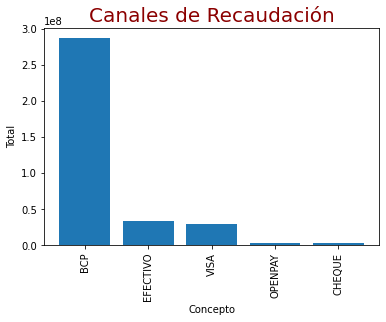

In [84]:
import matplotlib.pyplot as plt

x = dataTipoPagoTop5SortBySum.TipoPago.tolist()
y = dataTipoPagoTop5SortBySum.Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Canales de Recaudación', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [19]:
# Creando los deciles
groupDeciles = 5
countDeciles = 0
sumItem = 0
contRango = 1

dataConceptoDecil = []
dataConceptoValor = []

for valItem in dataConteptoSortBySum['Sum'].tolist():
  #print(valItem)
  
  if countDeciles < groupDeciles:
    countDeciles = countDeciles+1
    sumItem = sumItem + valItem
    #print(sumItem)
  else:
    #print(sumItem)
    #print('-----------------')
    dataConceptoDecil.append('Decil ' + str(contRango))
    dataConceptoValor.append(sumItem)

    sumItem = valItem
    contRango = contRango + 1
    countDeciles = 1

dataConceptoValor[9] = dataConceptoValor[9] + sumItem

In [20]:
#dataConceptoDecil
dataConceptoDFDecil = pd.DataFrame(dataConceptoValor, dataConceptoDecil).reset_index()
headers = ['Decil', 'Valor']
dataConceptoDFDecil.columns = headers
dataConceptoDFDecil

,Decil,Valor
0,Decil 1,3.565153e+08
1,Decil 2,9.988709e+05
2,Decil 3,3.370452e+05
3,Decil 4,1.936984e+05
4,Decil 5,8.821640e+04
5,Decil 6,3.143103e+04
6,Decil 7,1.166260e+04
7,Decil 8,3.779800e+03
8,Decil 9,2.417600e+03
9,Decil 10,1.109600e+03


In [21]:
dataConceptoDFDecil.Decil.tolist()

['Decil 1',
 'Decil 2',
 'Decil 3',
 'Decil 4',
 'Decil 5',
 'Decil 6',
 'Decil 7',
 'Decil 8',
 'Decil 9',
 'Decil 10']

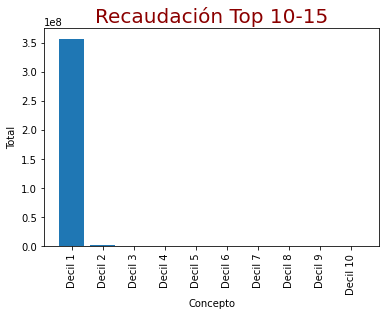

In [22]:
import matplotlib.pyplot as plt

x = dataConceptoDFDecil.Decil.tolist()
y = dataConceptoDFDecil.Valor.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 10-15', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

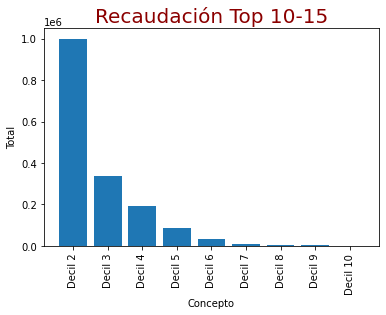

In [23]:
import matplotlib.pyplot as plt

x = dataConceptoDFDecil.Decil.tail(9).tolist()
y = dataConceptoDFDecil.Valor.tail(9).tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 10-15', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [24]:
rango = (dataConteptoSortBySum.index>=10)&(dataConteptoSortBySum.index<15)
rango

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

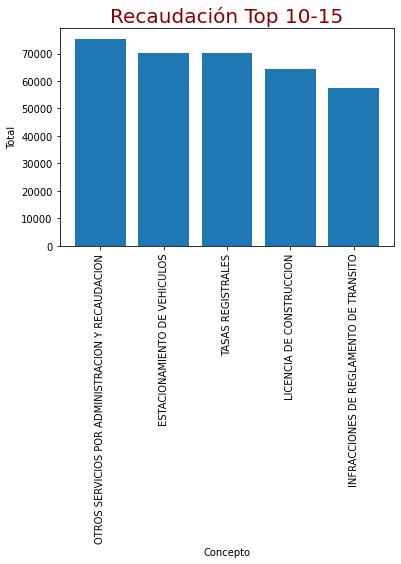

In [25]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 10-15', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [26]:
rango = (dataConteptoSortBySum.index>=10)&(dataConteptoSortBySum.index<20)
rango

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

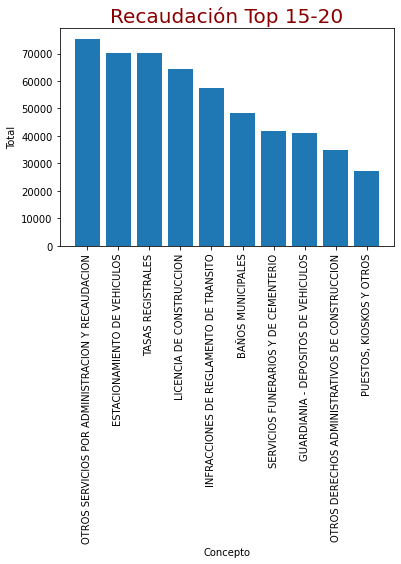

In [27]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 15-20', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [28]:
rango = (dataConteptoSortBySum.index>=33)
rango

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

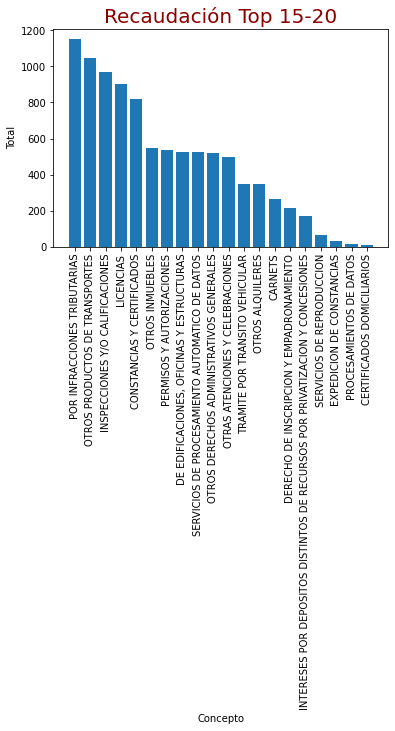

In [29]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 15-20', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()